In [106]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/targetencodingsdata/credit1.csv
/kaggle/input/targetencodingsdata/vgsales1.csv
/kaggle/input/targetencodingsdata/ctr_data.csv
/kaggle/input/targetencodingsdata/A_indiv_train.csv
/kaggle/input/targetencodingsdata/IMDB-Movie-Data1.csv


In [107]:
import warnings
warnings.filterwarnings('ignore')

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
data = pd.read_csv('/kaggle/input/targetencodingsdata/IMDB-Movie-Data1.csv')

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [111]:
data.info

<bound method DataFrame.info of      Rank                    Title                     Genre  \
0       1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2               Prometheus  Adventure,Mystery,Sci-Fi   
2       3                    Split           Horror,Thriller   
3       4                     Sing   Animation,Comedy,Family   
4       5            Suicide Squad  Action,Adventure,Fantasy   
..    ...                      ...                       ...   
995   996     Secret in Their Eyes       Crime,Drama,Mystery   
996   997          Hostel: Part II                    Horror   
997   998   Step Up 2: The Streets       Drama,Music,Romance   
998   999             Search Party          Adventure,Comedy   
999  1000               Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of m

In [112]:
data.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [113]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [114]:
data.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [115]:
data.tail(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
990,991,Underworld: Rise of the Lycans,"Action,Adventure,Fantasy",An origins story centered on the centuries-old...,Patrick Tatopoulos,"Rhona Mitra, Michael Sheen, Bill Nighy, Steven...",2009,92,6.6,129708,45.80,44.0
991,992,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0
992,993,Take Me Home Tonight,"Comedy,Drama,Romance","Four years after graduation, an awkward high s...",Michael Dowse,"Topher Grace, Anna Faris, Dan Fogler, Teresa P...",2011,97,6.3,45419,6.92,NaN
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [116]:
data.shape

(1000, 12)

In [117]:
data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

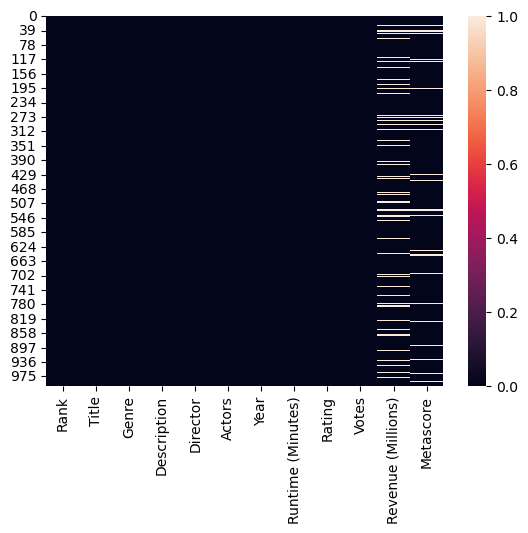

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

In [119]:
data = data.dropna(axis=0)

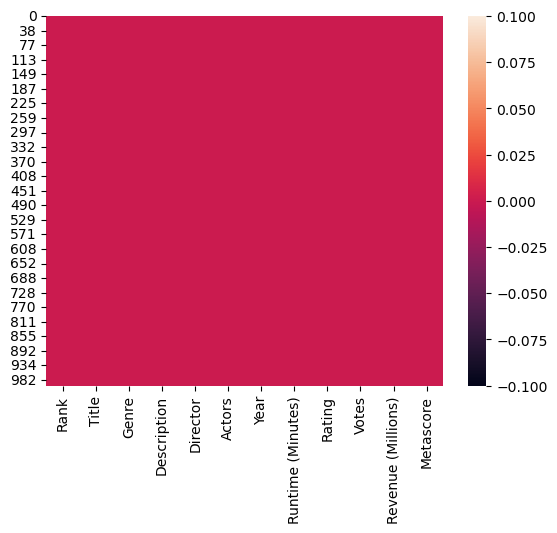

In [120]:
sns.heatmap(data.isnull())
plt.show()

In [121]:
dup_data=data.duplicated().any()
print(dup_data)

False


In [122]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


In [123]:
data[data['Runtime (Minutes)']>=180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

In [124]:
data[data['Runtime (Minutes)']>=50]['Title']

0       Guardians of the Galaxy
1                    Prometheus
2                         Split
3                          Sing
4                 Suicide Squad
                 ...           
993    Resident Evil: Afterlife
994                   Project X
996             Hostel: Part II
997      Step Up 2: The Streets
999                  Nine Lives
Name: Title, Length: 838, dtype: object

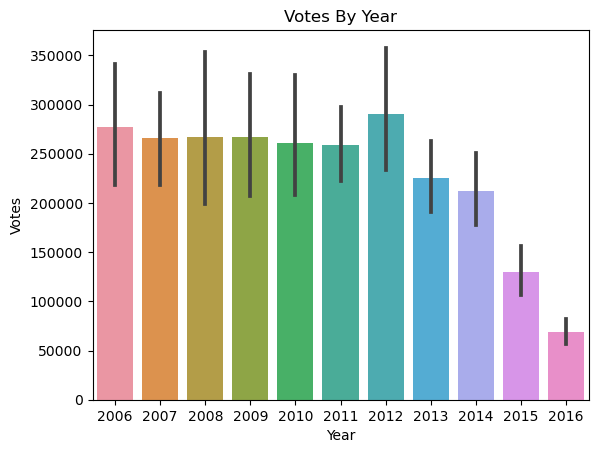

In [125]:
sns.barplot(x='Year',y='Votes',data=data)
plt.title("Votes By Year")
plt.show()

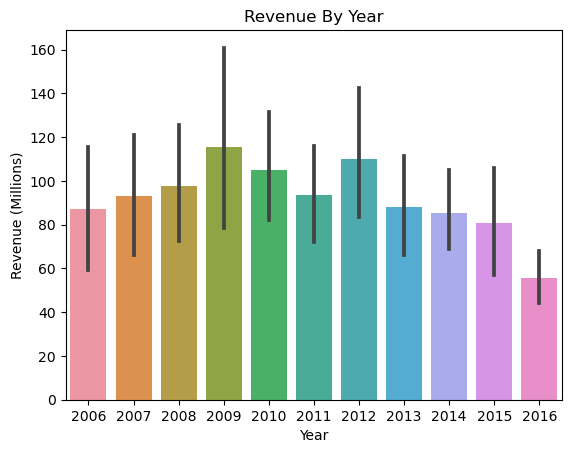

In [126]:
sns.barplot(x='Year',y='Revenue (Millions)',data=data)
plt.title("Revenue By Year")
plt.show()

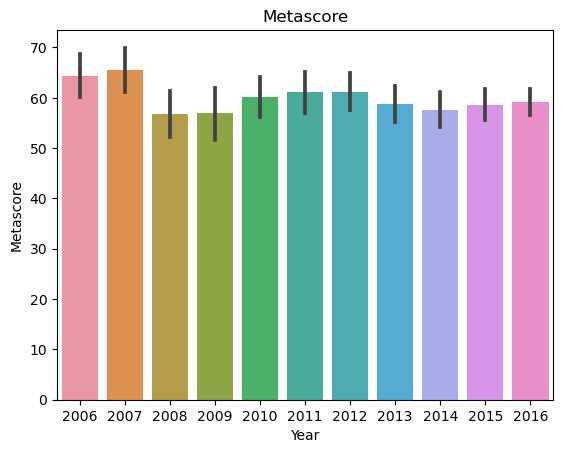

In [127]:
sns.barplot(x='Year',y='Metascore',data=data)
plt.title("Metascore")
plt.show()

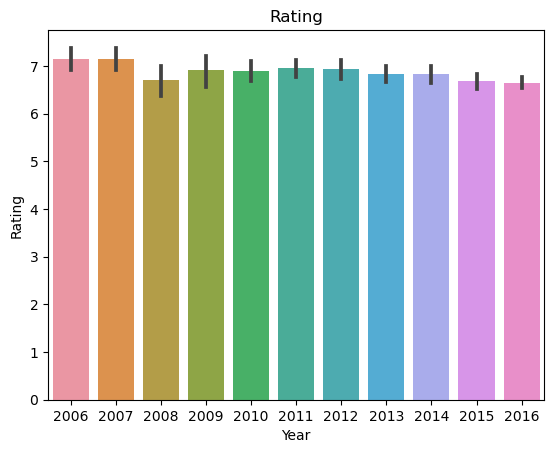

In [128]:
sns.barplot(x='Year',y='Rating',data=data)
plt.title("Rating")
plt.show()

In [129]:
data.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Christopher Nolan                   8.68
Olivier Nakache                     8.60
Makoto Shinkai                      8.60
Florian Henckel von Donnersmarck    8.50
Aamir Khan                          8.50
                                    ... 
Sam Taylor-Johnson                  4.10
Joey Curtis                         4.00
George Nolfi                        3.90
James Wong                          2.70
Jason Friedberg                     1.90
Name: Rating, Length: 524, dtype: float64

In [130]:
le =data.nlargest(10,'Runtime (Minutes)')[['Title','Runtime (Minutes)']]. \
set_index('Title')

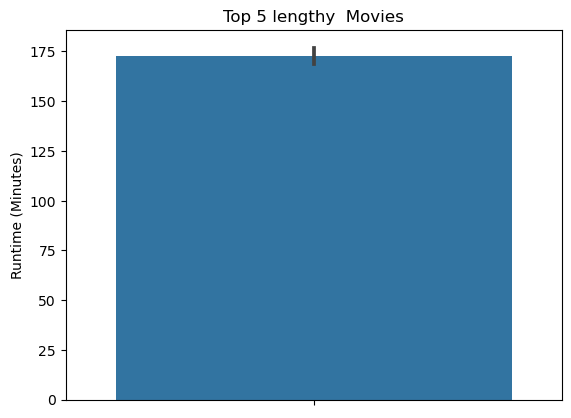

In [131]:
sns.barplot(le['Runtime (Minutes)'],y=le.index)
plt.title('Top 5 lengthy  Movies')
plt.show()

Text(0.5, 1.0, 'Number of Movies Per Year')

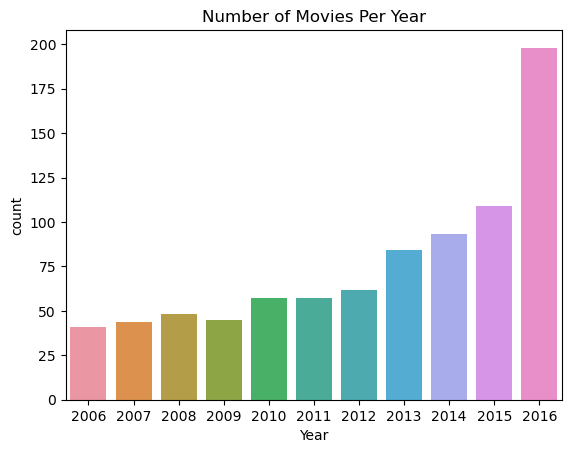

In [132]:
sns.countplot(x='Year',data=data)
plt.title("Number of Movies Per Year")

Text(0.5, 1.0, 'Number of Movies Per Year')

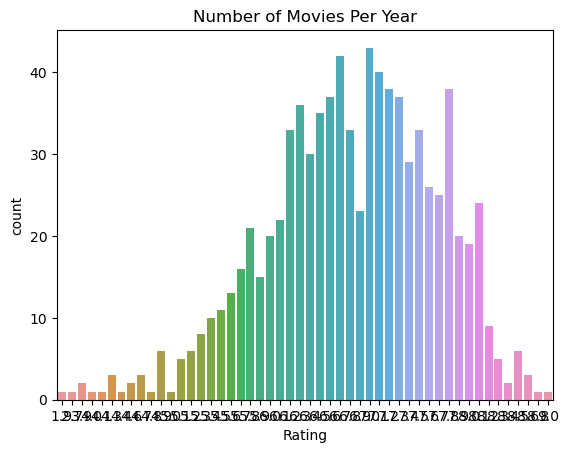

In [133]:
sns.countplot(x='Rating',data=data)
plt.title("Number of Movies Per Year")

In [134]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [135]:
data[data['Revenue (Millions)'].max() == data['Revenue (Millions)']]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

In [136]:
data[data['Revenue (Millions)'].min() == data['Revenue (Millions)']]['Title']

231    A Kind of Murder
Name: Title, dtype: object

In [137]:
top_10=data.nlargest(10,'Rating')[['Title','Rating','Director']].set_index('Title')

In [138]:
top_10

,Rating,Director
Title,,
The Dark Knight,9.0,Christopher Nolan
Inception,8.8,Christopher Nolan
Interstellar,8.6,Christopher Nolan
Kimi no na wa,8.6,Makoto Shinkai
The Intouchables,8.6,Olivier Nakache
The Prestige,8.5,Christopher Nolan
The Departed,8.5,Martin Scorsese
The Dark Knight Rises,8.5,Christopher Nolan
Whiplash,8.5,Damien Chazelle


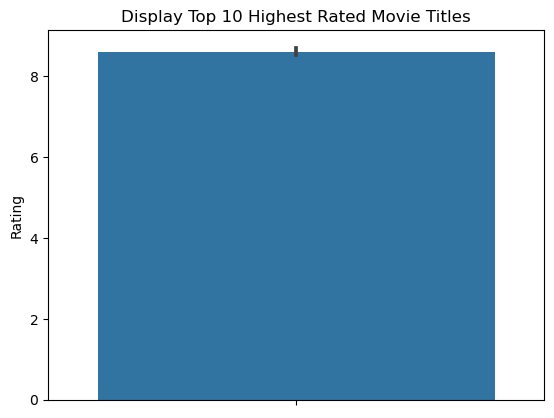

In [139]:
sns.barplot(top_10['Rating'],y=top_10.index)
plt.title("Display Top 10 Highest Rated Movie Titles")
plt.show()

In [140]:
data.sort_values(by='Revenue (Millions)',ascending=False).head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
12,13,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
119,120,Finding Dory,"Animation,Adventure,Comedy","The friendly but forgetful blue tang fish, Dor...",Andrew Stanton,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",2016,97,7.4,157026,486.29,77.0
94,95,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,7.4,516895,458.99,66.0
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
578,579,The Hunger Games: Catching Fire,"Action,Adventure,Mystery",Katniss Everdeen and Peeta Mellark become targ...,Francis Lawrence,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2013,146,7.6,525646,424.65,76.0


In [141]:
top_10 = data.nlargest(10,'Revenue (Millions)')[['Title','Director','Revenue (Millions)']].set_index('Title')

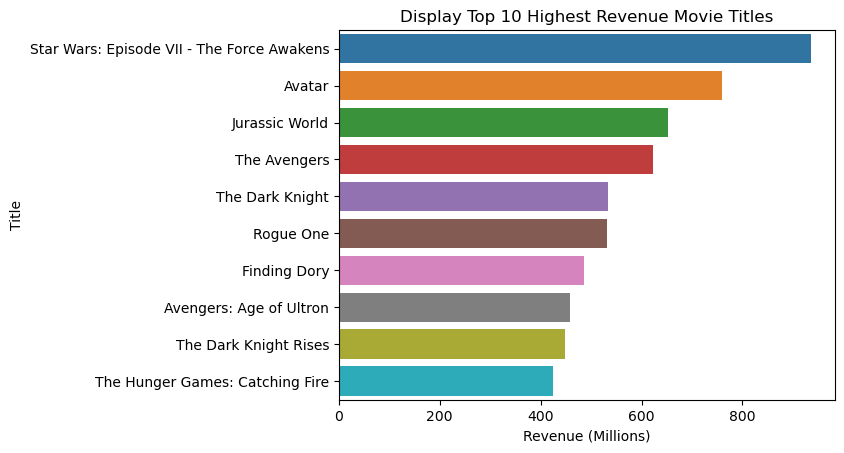

In [142]:
sns.barplot(x='Revenue (Millions)', y=top_10.index, data=top_10)
plt.title("Display Top 10 Highest Revenue Movie Titles")
plt.show()

In [143]:
data.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0
10,11,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0


In [144]:
data1=data.groupby('Year')['Year','Rating'].mean().\
sort_values(by='Rating',ascending=False).set_index('Year')

# 

In [145]:
data1

,Rating
Year,
2006.0,7.143902
2007.0,7.140909
2011.0,6.945614
2012.0,6.933871
2009.0,6.911111
2010.0,6.894737
2013.0,6.832143
2014.0,6.822581
2008.0,6.708333


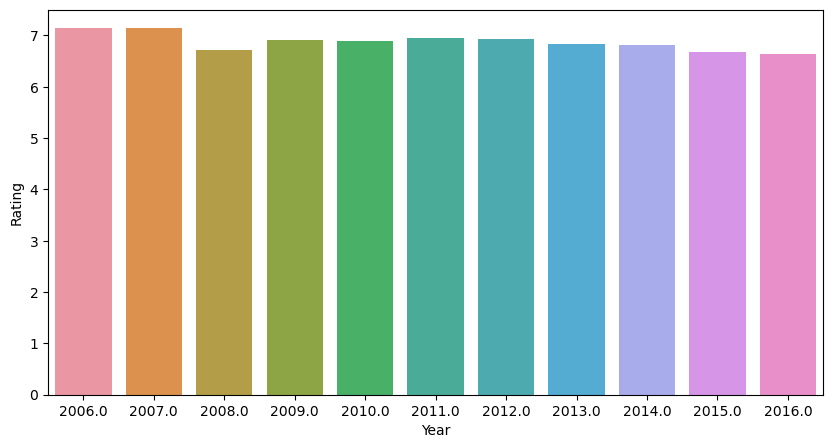

In [160]:
plt.figure(figsize=(10,5))
sns.barplot(x=data1.index, y=data1['Rating'])
plt.show()

<Axes: xlabel='Rating', ylabel='Revenue (Millions)'>

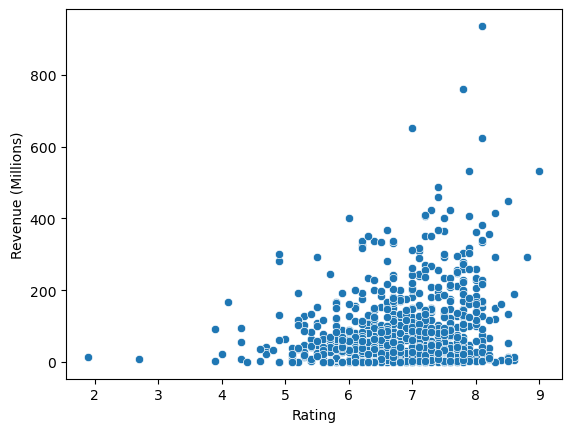

In [168]:
sns.scatterplot(x='Rating',y='Revenue (Millions)',data=data)

In [169]:
def rating(rating):
    if rating>=7.0:
        return 'Excellent'
    elif rating>=6.0:
        return 'Good'
    else:
        return 'Average'

In [170]:
data.head(1)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0


In [171]:
data['Genre'].dtype

dtype('O')

In [167]:
data['Genre'].str.contains('Acton')

0      False
1      False
2      False
3      False
4      False
       ...  
993    False
994    False
996    False
997    False
999    False
Name: Genre, Length: 838, dtype: bool

In [166]:
data[data['Genre'].str.contains('Action', case=False)]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
12,13,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...
954,955,Death Race,"Action,Sci-Fi,Thriller",Ex-con Jensen Ames is forced by the warden of ...,Paul W.S. Anderson,"Jason Statham, Joan Allen, Tyrese Gibson, Ian ...",2008,105,6.4,173731,36.06,43.0
956,957,Legion,"Action,Fantasy,Horror",When a group of strangers at a dusty roadside ...,Scott Stewart,"Paul Bettany, Dennis Quaid, Charles S. Dutton,...",2010,100,5.2,84158,40.17,32.0
958,959,3 Days to Kill,"Action,Drama,Thriller",A dying CIA agent trying to reconnect with his...,McG,"Kevin Costner, Hailee Steinfeld, Connie Nielse...",2014,117,6.2,73567,30.69,40.0
990,991,Underworld: Rise of the Lycans,"Action,Adventure,Fantasy",An origins story centered on the centuries-old...,Patrick Tatopoulos,"Rhona Mitra, Michael Sheen, Bill Nighy, Steven...",2009,92,6.6,129708,45.80,44.0


In [165]:
len(data[data['Genre'].str.contains('Action',case=False)])

277

In [164]:
data['Genre']

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
993     Action,Adventure,Horror
994                      Comedy
996                      Horror
997         Drama,Music,Romance
999       Comedy,Family,Fantasy
Name: Genre, Length: 838, dtype: object

In [163]:
list1=[]
for value in data['Genre']:
    list1.append(value.split(','))

In [162]:
list1

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Horror', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi']

In [ ]:
one_d=[]
for item in list1:
    for item1 in item:
        one_d.append(item1)

In [161]:
one_d

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Horror',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Advent

In [172]:
uni_list=[]
for item in one_d:
    if item not in uni_list:
        uni_list.append(item)

In [173]:
uni_list

['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Western',
 'Crime',
 'War',
 'Musical',
 'Sport']